<a href="https://www.kaggle.com/code/muratdemir4/turkey-tourist-analysis?scriptVersionId=100553147" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/population-by-country-2020/population_by_country_2020.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_growth.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_ppp_per_capita.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_ppp.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_per_capita.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_per_capita_growth.csv
/kaggle/input/tourist-number-data-in-turkey/tourist_numbers_Turkey.csv


In [2]:



import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 


## Chapter 1. Loading and Evaluating the Dataset


In [3]:
df_t = pd.read_csv('/kaggle/input/tourist-number-data-in-turkey/tourist_numbers_Turkey.csv')

In [4]:
df_t.head(10)

,Date,ALMANYA,ARNAVUTLUK,AVUSTURYA,BELCIKA,BOSNAHERSEK,BULGARISTAN,CEKCUMHURIYETI,DANIMARKA,ESTONYA,...,TAYLAND,URDUN,YEMEN,DASYA,ASYATOP,AVUSTRALYA,YENIZELLANDA,OKYANUSYA,MILLIYESIZ,GTOPLAM
0,2008-01-01,17723300.0,281100.0,2020700.0,1238900.0,254600.0,9904800.0,182400.0,561300.0,42600.0,...,56300.0,278700.0,11600.0,292100.0,13698000.0,482300.0,49700.0,300.0,105600.0,91953900.0
1,2008-02-01,14366600.0,260400.0,1629500.0,1130900.0,234200.0,8270700.0,206400.0,546400.0,51500.0,...,51600.0,259400.0,29900.0,319100.0,15394600.0,325400.0,39400.0,1100.0,94700.0,85875100.0
2,2008-03-01,24979700.0,362600.0,2355800.0,2109700.0,295200.0,10287700.0,252400.0,1128800.0,69500.0,...,100300.0,328000.0,28700.0,407300.0,21571100.0,357100.0,59200.0,6900.0,123300.0,122156800.0
3,2008-04-01,24253100.0,321900.0,2266800.0,3077200.0,353900.0,11062700.0,419800.0,1087800.0,109800.0,...,108100.0,345500.0,33100.0,454700.0,22719100.0,1008400.0,224900.0,7000.0,130400.0,141149500.0
4,2008-05-01,39972400.0,415600.0,3226500.0,5048300.0,470900.0,14864200.0,928600.0,2600800.0,450800.0,...,100500.0,433600.0,44400.0,785400.0,25861000.0,1301100.0,260600.0,1100.0,148100.0,250999700.0
5,2008-06-01,36414500.0,486200.0,4476200.0,5441500.0,609300.0,14289600.0,2282400.0,2959100.0,464900.0,...,77900.0,732900.0,42600.0,665300.0,31828600.0,1302400.0,268700.0,1100.0,197900.0,290294800.0
6,2008-07-01,51984900.0,971800.0,6917400.0,10271400.0,885400.0,14919400.0,3061700.0,6227100.0,560200.0,...,77300.0,1533500.0,63500.0,952200.0,40126800.0,1507400.0,333700.0,1700.0,364100.0,354579500.0
7,2008-08-01,72877400.0,1253400.0,14520500.0,13076900.0,955400.0,15192400.0,2995500.0,5423300.0,494400.0,...,95400.0,1628500.0,100500.0,841600.0,48172300.0,1787500.0,284200.0,3600.0,449900.0,445008100.0
8,2008-09-01,53688400.0,898400.0,4999600.0,7913800.0,539600.0,16286100.0,2993300.0,2936200.0,490400.0,...,78000.0,288100.0,26100.0,593100.0,25876600.0,1835200.0,345000.0,2600.0,207600.0,328699800.0
9,2008-10-01,60136700.0,389000.0,4166800.0,5064100.0,587000.0,12497600.0,1954400.0,3103100.0,467500.0,...,133100.0,694500.0,47300.0,756200.0,32859500.0,1631500.0,334600.0,1100.0,239400.0,283997300.0


In [5]:
df_t.shape



(165, 103)

Our dataset is not very big. It just have 165 cols and 103 rows.

In [6]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Columns: 103 entries, Date to  GTOPLAM
dtypes: float64(102), object(1)
memory usage: 132.9+ KB


In [7]:
df_t.isna().any().any()



False

I use this basic code to understand wheter there are null values or not. In this dataset we do not have any null values as it's output is 'False'.

In [8]:


df_t.columns = df_t.columns.str.strip()
df_t.GTOPLAM.sum()
print('Total numbers of tourists is = {}'.format(df_t.GTOPLAM.sum()))

Total numbers of tourists is = 42060500699.0


Here, I want to find the genaral total of tourists who visits Turkey within the years listed in the dataset. In Turkish, 'GTOPLAM' implies General Total.

## 1.1 Data Cleaning and Preparation 


The names should be translated to English to be understood by every reader clearly. By 'set_axis' we can change the names quite easily.

In [9]:



df_t.set_axis(["DATE", "GERMANY" ,
 "ALBANIA",
 "AUSTURIA",
 "BELGIUM",
 "BOSNIA AND HERZEGOVINA",
 "BULGARIA" ,
 "CZECH REPUBLIC" ,
 "DENMARK" ,
 "ESTONIA" ,
 "FINLAND" ,
 "FRANCE" ,
 "CYPRUS" ,
 "CROATIA" ,
 "NETHERLAND" ,
 "ENGLAND" ,
 "IRELAND" ,
 "SPAIN" ,
 "SWEDEN" ,
 "SWITZERLAND" ,
 "ITALY" ,
 "ICELAND" ,
 "MONTENEGRO" ,
 "KOSOVO" ,
 "LATVIA" ,
 "LITHUANIA" ,
 "LUXEMBURG" ,
 "HUNGARY" ,
 "MAKEDONIA" ,
 "MALTA" ,
 "NORWAY" ,
 "POLAND" ,
 "PORTUGAL" ,
 "ROMANIA" ,
 "SERBIA" ,
 "SLOVAKIA" ,
 "SLOVENIA" ,
 "GREECE" ,
 "OTHER EUROPE" ,
 "EUROPEAN" ,
 "AZERBAIJAN"  ,
 "BELARUS" ,
 "ARMENIA" ,
 "GEORGIA" ,
 "KAZAKHISTAN" ,
 "KYRGYZSTAN" ,
 "MOLDOVAREP" ,
 "OZBEKISTAN",
 "RUSSIA" ,
 "TACHIKISTAN" ,
 "TURKMENISTAN" ,
 "UKRAINE" ,
 "SUM OF CIS" ,
 "USA" ,
 "ARGENTINE" ,
 "BRAZIL" ,
 "CANADA" ,
 "COLOMBIA" ,
 "MEXICO" ,
 "CHILE" ,
 "VENEZUELA" ,
 "OTHER AMERICA" ,
 "AMERICA" ,
 "ALGERIA" ,
 "MOROCCO" ,
 "AFRICA" ,
 "LIBYA" ,
 "EGYPT" ,
 "SUDAN" ,
 "TUNISIA" ,
 "OTHER AFRICA" ,
 "SUM OF AFRICA" ,
 "UAE" ,
 "BAHRAIN" ,
 "BANGLADESH" ,
 "CHINA" ,
 "INDONESIA" ,
 "PHILIPPINES" ,
 "SOUTH KOREA" ,
 "INDIA" ,
 "IRAQ" ,
 "IRAN" ,
 "ISRAEL" ,
 "JAPAN" ,
 "NORTHERN CYPRUS" ,
 "QATAR" ,
 "KUWAIT" ,
 "LEBANON" ,
 "MALAYSIA" ,
 "PAKISTAN" ,
 "SINGAPORE" ,
 "SYRIA" ,
 "SUUDARABIA" ,
 "THAILAND" ,
 "URDUN" ,
 "YEMEN" ,
 "OTHER ASIA" ,
 "ASIA" ,
 "AUSTRALIA" ,
 "NEW ZEALAND" ,
 "OCEANIA" ,
 "WITHOUT NATION",
 "GENERAL TOTAL"] , axis=1, inplace=True)
df_t

,DATE,GERMANY,ALBANIA,AUSTURIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUBLIC,DENMARK,ESTONIA,...,THAILAND,URDUN,YEMEN,OTHER ASIA,ASIA,AUSTRALIA,NEW ZEALAND,OCEANIA,WITHOUT NATION,GENERAL TOTAL
0,2008-01-01,17723300.0,281100.0,2020700.0,1238900.0,254600.0,9904800.0,182400.0,561300.0,42600.0,...,56300.0,278700.0,11600.0,292100.0,13698000.0,482300.0,49700.0,300.0,105600.0,91953900.0
1,2008-02-01,14366600.0,260400.0,1629500.0,1130900.0,234200.0,8270700.0,206400.0,546400.0,51500.0,...,51600.0,259400.0,29900.0,319100.0,15394600.0,325400.0,39400.0,1100.0,94700.0,85875100.0
2,2008-03-01,24979700.0,362600.0,2355800.0,2109700.0,295200.0,10287700.0,252400.0,1128800.0,69500.0,...,100300.0,328000.0,28700.0,407300.0,21571100.0,357100.0,59200.0,6900.0,123300.0,122156800.0
3,2008-04-01,24253100.0,321900.0,2266800.0,3077200.0,353900.0,11062700.0,419800.0,1087800.0,109800.0,...,108100.0,345500.0,33100.0,454700.0,22719100.0,1008400.0,224900.0,7000.0,130400.0,141149500.0
4,2008-05-01,39972400.0,415600.0,3226500.0,5048300.0,470900.0,14864200.0,928600.0,2600800.0,450800.0,...,100500.0,433600.0,44400.0,785400.0,25861000.0,1301100.0,260600.0,1100.0,148100.0,250999700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2021-05-01,6029500.0,407600.0,617200.0,725800.0,432700.0,5757300.0,147900.0,194200.0,391800.0,...,33100.0,755100.0,67200.0,802800.0,12260500.0,61500.0,9700.0,1300.0,242500.0,75751800.0
161,2021-06-01,13712400.0,823300.0,1064700.0,1108900.0,1239500.0,11812500.0,592300.0,352500.0,466000.0,...,33400.0,2689000.0,106900.0,1402500.0,23848500.0,63600.0,15100.0,1700.0,456800.0,149195500.0
162,2021-07-01,40401800.0,1139500.0,3079800.0,4046600.0,2002900.0,15619400.0,1740500.0,2293400.0,627300.0,...,41500.0,6351300.0,200800.0,2532400.0,47590800.0,123400.0,29600.0,2300.0,799800.0,323155500.0
163,2021-08-01,81173400.0,1559000.0,9955200.0,11891300.0,2838500.0,14719300.0,2076900.0,2491700.0,651000.0,...,51900.0,6053400.0,264000.0,3320400.0,51612500.0,138300.0,31400.0,4400.0,998200.0,457826500.0


In [10]:
# Let's extract zeros
df_t.iloc[:,1:]=((df_t.iloc[:,1:])/100).astype('int')
# Control the result
df_sum = df_t.sum(numeric_only = True )
df_sum

GERMANY                    59329922
ALBANIA                     1071731
AUSTURIA                    5773060
BELGIUM                     7168944
BOSNIA AND HERZEGOVINA      1103243
                            ...    
AUSTRALIA                   1746661
NEW ZEALAND                  296525
OCEANIA                       11665
WITHOUT NATION               613157
GENERAL TOTAL             420605006
Length: 102, dtype: int64

## Chapter 2. Data Visualization 

I want to uncover top ten countries but because of the continents in the dataset that cover first four of list I have to call largest 14 columns.

In [11]:
top_ten = df_sum.nlargest(14)
top_ten

GENERAL TOTAL    420605006
EUROPEAN         219621992
SUM OF CIS       108026112
ASIA              67322127
GERMANY           59329922
RUSSIA            51876544
ENGLAND           29183629
BULGARIA          23310568
IRAN              21004970
GEORGIA           20137812
NETHERLAND        14366875
AMERICA           13251904
UKRAINE           13161806
FRANCE            11355850
dtype: int64

In [12]:
# extract the continents to find out only countries 
top_ten_countries = top_ten[4:14]
top_ten_countries


GERMANY       59329922
RUSSIA        51876544
ENGLAND       29183629
BULGARIA      23310568
IRAN          21004970
GEORGIA       20137812
NETHERLAND    14366875
AMERICA       13251904
UKRAINE       13161806
FRANCE        11355850
dtype: int64

I set these countries as a new dataframe to visualize it easily.

In [13]:
top_ten_countries = top_ten_countries.copy()

Country = pd.Series(["GERMANY","RUSSIA","ENGLAND","BULGARIA","IRAN","GEORGIA","HOLLAND","AMERICA","UKRAINE","FRANCE"], name ='Country')
Visitors = pd.Series([59329922,51876544,29183629,23310568,21004970,20137812,14366875,13251904,13161806,11355850], name ='Visitors')
top_ten_countries= pd.concat([Country,Visitors],axis = 1)
top_ten_countries

,Country,Visitors
0,GERMANY,59329922
1,RUSSIA,51876544
2,ENGLAND,29183629
3,BULGARIA,23310568
4,IRAN,21004970
5,GEORGIA,20137812
6,HOLLAND,14366875
7,AMERICA,13251904
8,UKRAINE,13161806
9,FRANCE,11355850


## 2.1 Highest and Lowest Countries 

Text(0, 0.5, 'Total Visitors')

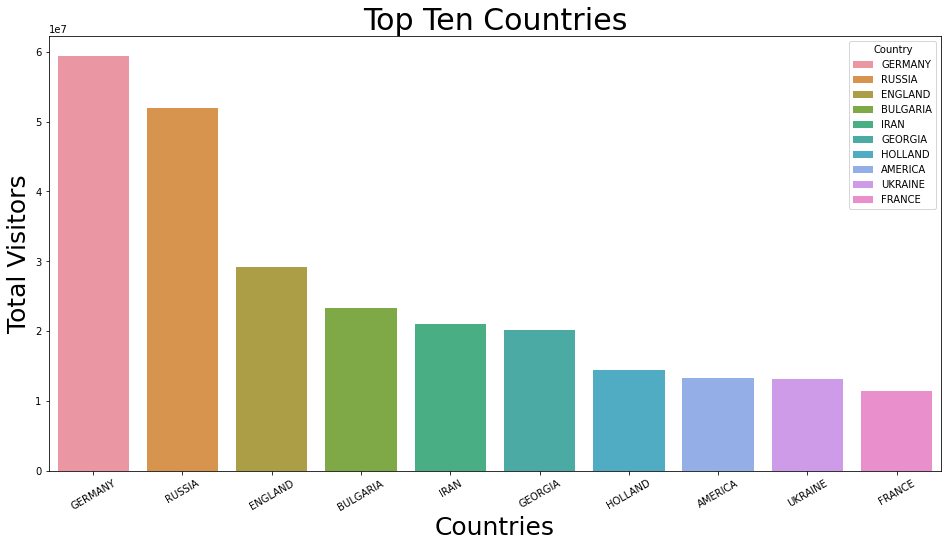

In [14]:
plt.figure(figsize = (16,8))
sns.set_palette("Set2")
ax = sns.barplot(x = 'Country', y = 'Visitors',data = top_ten_countries, hue = 'Country',dodge = False,)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Top Ten Countries', size = 30)
ax.set_xlabel('Countries',size = 25)
ax.set_ylabel('Total Visitors', size = 25)


In [15]:
# Lets look last ten countries 
last_ten_countries = df_sum.nsmallest(11)
last_ten_countries 

OCEANIA          11665
OTHER EUROPE     33448
ICELAND          74362
MALTA            82686
VENEZUELA       110621
BANGLADESH      119018
LUXEMBURG       140813
SUDAN           141462
CHILE           163622
CYPRUS          166526
MONTENEGRO      226800
dtype: int64

By using same method we can visualize last ten countries.

In [16]:
last_ten_counries = last_ten_countries.copy()

countries = pd.Series(["OCENIA","ICELAND","MALTA","VENEZUELA","BANGLADESH","LUXEMBURG","SUDAN","CHILE","CYPRUS","MONTENEGRO"], name = 'countries')
visitors = pd.Series([11665, 74362, 82686, 110621, 119018, 140813, 141462, 63622, 166526, 226800], name = 'visitors')
last_ten_countries = pd.concat([countries,visitors], axis = 1)
last_ten_countries 

,countries,visitors
0,OCENIA,11665
1,ICELAND,74362
2,MALTA,82686
3,VENEZUELA,110621
4,BANGLADESH,119018
5,LUXEMBURG,140813
6,SUDAN,141462
7,CHILE,63622
8,CYPRUS,166526
9,MONTENEGRO,226800


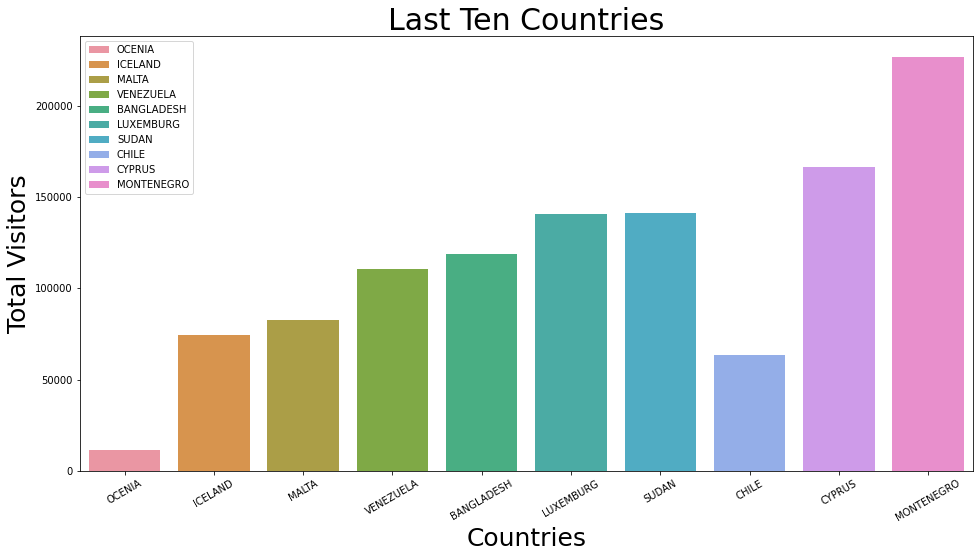

In [17]:
plt.figure(figsize = (16,8))
sns.set_palette("Set1")
ax = sns.barplot(x = 'countries', y = 'visitors',data = last_ten_countries, hue = 'countries',dodge = False,)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Last Ten Countries', size = 30)
ax.set_xlabel('Countries',size = 25)
ax.set_ylabel('Total Visitors', size = 25)
plt.legend(loc='upper left')

## 2.2 A Date-based Visualization 

In [18]:
df_t.copy()
df_t['DATE'] = pd.to_datetime(df_t.DATE)
df_t.DATE

0     2008-01-01
1     2008-02-01
2     2008-03-01
3     2008-04-01
4     2008-05-01
         ...    
160   2021-05-01
161   2021-06-01
162   2021-07-01
163   2021-08-01
164   2021-09-01
Name: DATE, Length: 165, dtype: datetime64[ns]

In this part my aim is to find the general trends in terms of dates like months, seasons and years. I am using 'to_datetime' to reach pupose.

In [19]:
df_t = df_t.set_index(pd.to_datetime(df_t['DATE']))

df_t['YEAR'] = pd.DatetimeIndex(df_t.DATE).year
df_t['MONTH'] = pd.DatetimeIndex(df_t.DATE).month
df_t['DAY'] = pd.DatetimeIndex(df_t.DATE).day
df_t['WEEKDAY'] = pd.DatetimeIndex(df_t.DATE).weekday
df_t

,DATE,GERMANY,ALBANIA,AUSTURIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUBLIC,DENMARK,ESTONIA,...,ASIA,AUSTRALIA,NEW ZEALAND,OCEANIA,WITHOUT NATION,GENERAL TOTAL,YEAR,MONTH,DAY,WEEKDAY
DATE,,,,,,,,,,,,,,,,,,,,,
2008-01-01,2008-01-01,177233,2811,20207,12389,2546,99048,1824,5613,426,...,136980,4823,497,3,1056,919539,2008,1,1,1
2008-02-01,2008-02-01,143666,2604,16295,11309,2342,82707,2064,5464,515,...,153946,3254,394,11,947,858751,2008,2,1,4
2008-03-01,2008-03-01,249797,3626,23558,21097,2952,102877,2524,11288,695,...,215711,3571,592,69,1233,1221568,2008,3,1,5
2008-04-01,2008-04-01,242531,3219,22668,30772,3539,110627,4198,10878,1098,...,227191,10084,2249,70,1304,1411495,2008,4,1,1
2008-05-01,2008-05-01,399724,4156,32265,50483,4709,148642,9286,26008,4508,...,258610,13011,2606,11,1481,2509997,2008,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,2021-05-01,60295,4076,6172,7258,4327,57573,1479,1942,3918,...,122605,615,97,13,2425,757518,2021,5,1,5
2021-06-01,2021-06-01,137124,8233,10647,11089,12395,118125,5923,3525,4660,...,238485,636,151,17,4568,1491955,2021,6,1,1
2021-07-01,2021-07-01,404018,11395,30798,40466,20029,156194,17405,22934,6273,...,475908,1234,296,23,7998,3231555,2021,7,1,3


Text(0, 0.5, 'GENERAL TOTAL')

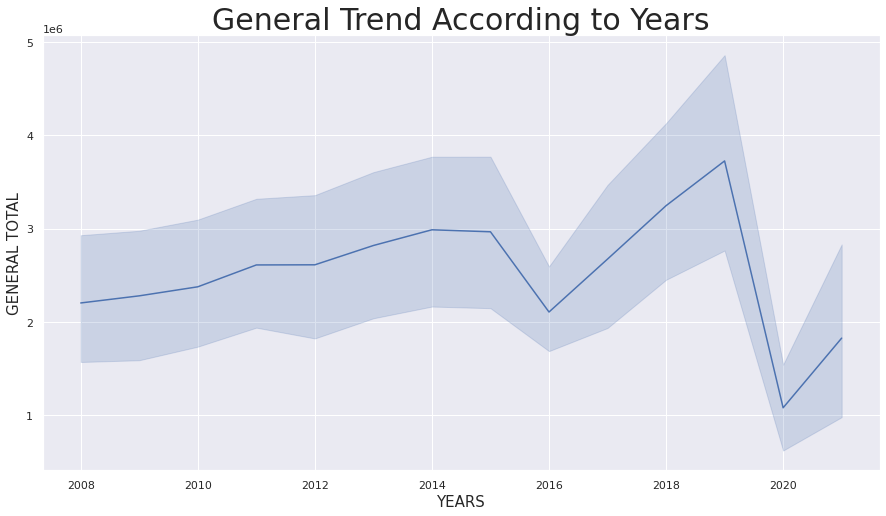

In [20]:
# Here I want to display general trend of tourists from 2008 to the 2021 


plt.figure(figsize = (15,8))
sns.set_theme(style="darkgrid")
General_Trend = sns.lineplot( x ='YEAR', y = 'GENERAL TOTAL',data = df_t, palette = 'Set2')
General_Trend.set_title('General Trend According to Years',size = 30)
General_Trend.set_xlabel('YEARS', size = 15)
General_Trend.set_ylabel('GENERAL TOTAL', size = 15)

We see that the positive trend began to change in a negative way after 2015. From 2016 to 2019 a radical upward climb is seen. However, it is clear that after 2019 a dramatic fall is seen.


Text(0, 0.5, 'GENERAL TOTAL')

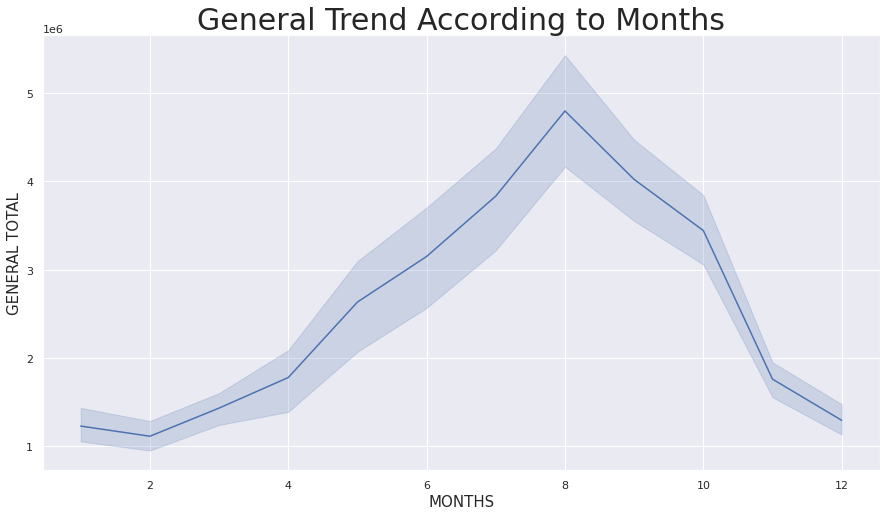

In [21]:
# Here, my aim is to ascertain  the season mostly atrract tourists.
plt.figure(figsize = (15,8))
sns.set_theme(style="darkgrid")
General_Trend = sns.lineplot( x ='MONTH', y = 'GENERAL TOTAL',data = df_t, palette = 'Set2')
General_Trend.set_title('General Trend According to Months',size = 30)
General_Trend.set_xlabel('MONTHS', size = 15)
General_Trend.set_ylabel('GENERAL TOTAL', size = 15)


Here, the aim is to explore the general trend within a whole year.The tableu shows that vast majority of tourists prefer the summer months. From this standpont it can be said that the main aim of tourist is spending their summer vacation in Turkey.


## 2.3 Continental Analysis

When we examine the dataset carrefully we see there are some series like 'Other Europe'. This may barrier us to reach the a trustfull result. Therefore, we should add related series like 'Other Europe ' to the 'Europe'

In [22]:


continents = df_t[['DATE',
      'OTHER EUROPE',
      'EUROPEAN',
      'SUM OF CIS',
       'OTHER AMERICA',
       'AMERICA',
      'OTHER AFRICA',
       'AFRICA' ,
       'OTHER ASIA' ,
       'ASIA',]]
continents



,DATE,OTHER EUROPE,EUROPEAN,SUM OF CIS,OTHER AMERICA,AMERICA,OTHER AFRICA,AFRICA,OTHER ASIA,ASIA
DATE,,,,,,,,,,
2008-01-01,2008-01-01,91,551693,177593,1590,31621,1164,586,2921,136980
2008-02-01,2008-02-01,60,470599,188167,1895,26828,1600,578,3191,153946
2008-03-01,2008-03-01,145,732094,208273,1857,40861,1709,1077,4073,215711
2008-04-01,2008-04-01,133,861799,233578,2235,54635,1826,1267,4547,227191
2008-05-01,2008-05-01,170,1542177,551839,3368,114504,2807,2244,7854,258610
...,...,...,...,...,...,...,...,...,...,...
2021-05-01,2021-05-01,33,296209,287510,1231,21978,9344,249,8028,122605
2021-06-01,2021-06-01,53,609146,543310,2180,41124,14568,384,14025,238485
2021-07-01,2021-07-01,248,1261682,1333156,4605,72844,16811,759,25324,475908


In [23]:
Continents = continents.copy()

Continents['SUM OF EUROPE'] = df_t['OTHER EUROPE'] + df_t['EUROPEAN']

Continents['SUM OF AMERICA'] = df_t['OTHER AMERICA'] + df_t['AMERICA']

Continents['SUM OF AFRICA'] = df_t['OTHER AFRICA'] + df_t['AFRICA']

Continents['SUM OF ASIA'] = df_t['OTHER ASIA'] + df_t['ASIA']

Continents
# By this basic method we can reach the real tourist numbers of each continents given in the dataset.


,DATE,OTHER EUROPE,EUROPEAN,SUM OF CIS,OTHER AMERICA,AMERICA,OTHER AFRICA,AFRICA,OTHER ASIA,ASIA,SUM OF EUROPE,SUM OF AMERICA,SUM OF AFRICA,SUM OF ASIA
DATE,,,,,,,,,,,,,,
2008-01-01,2008-01-01,91,551693,177593,1590,31621,1164,586,2921,136980,551784,33211,1750,139901
2008-02-01,2008-02-01,60,470599,188167,1895,26828,1600,578,3191,153946,470659,28723,2178,157137
2008-03-01,2008-03-01,145,732094,208273,1857,40861,1709,1077,4073,215711,732239,42718,2786,219784
2008-04-01,2008-04-01,133,861799,233578,2235,54635,1826,1267,4547,227191,861932,56870,3093,231738
2008-05-01,2008-05-01,170,1542177,551839,3368,114504,2807,2244,7854,258610,1542347,117872,5051,266464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,2021-05-01,33,296209,287510,1231,21978,9344,249,8028,122605,296242,23209,9593,130633
2021-06-01,2021-06-01,53,609146,543310,2180,41124,14568,384,14025,238485,609199,43304,14952,252510
2021-07-01,2021-07-01,248,1261682,1333156,4605,72844,16811,759,25324,475908,1261930,77449,17570,501232


In [24]:
C_Total = Continents[['SUM OF EUROPE','SUM OF AMERICA','SUM OF AFRICA','SUM OF ASIA']]
C_Total

# By this dataset that is derived from former one we can evaluate tourist numbers in terms of continents.

,SUM OF EUROPE,SUM OF AMERICA,SUM OF AFRICA,SUM OF ASIA
DATE,,,,
2008-01-01,551784,33211,1750,139901
2008-02-01,470659,28723,2178,157137
2008-03-01,732239,42718,2786,219784
2008-04-01,861932,56870,3093,231738
2008-05-01,1542347,117872,5051,266464
...,...,...,...,...
2021-05-01,296242,23209,9593,130633
2021-06-01,609199,43304,14952,252510
2021-07-01,1261930,77449,17570,501232


<AxesSubplot:>

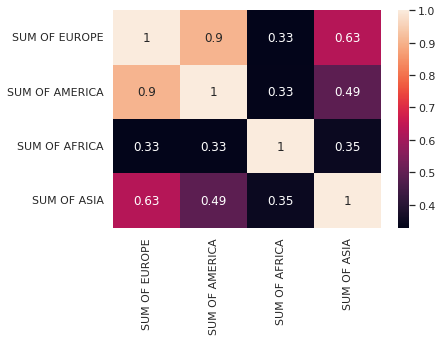

In [25]:
sns.heatmap(C_Total.corr(),annot = True)

Heatmap make it easier to investigate the correlation between countries.

Text(0.5, 1.0, 'Trends of Continents According to Years')

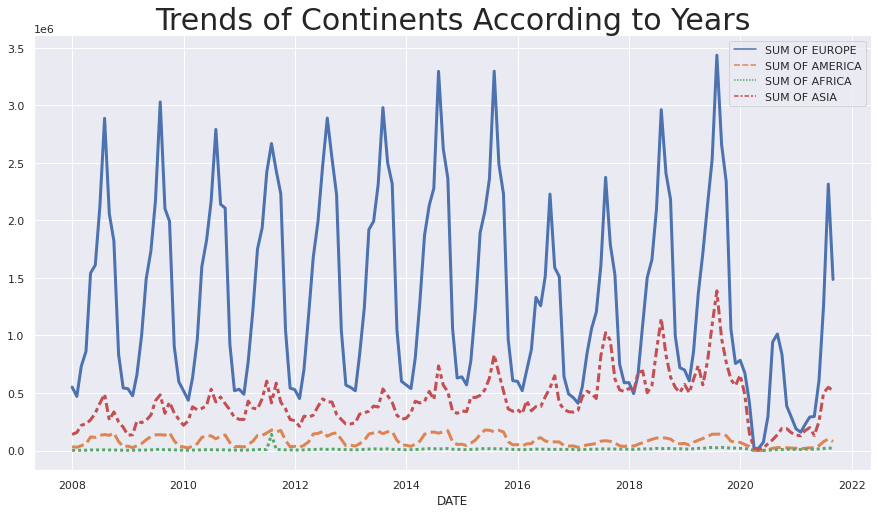

In [26]:
plt.figure(figsize = (15,8))
sns.set_palette('Set2')
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data = C_Total,linewidth = 3)
ax.set_title('Trends of Continents According to Years', size = 30)

Ploting continents in one graph enables us to analyse and compare the general trend of each continent with other. For example,Europe is leading continent while Africa pursuits a path that almost equal to zero.

## 2.3 Analysis With Multiple Variables 

Our dataset is consist of only one varieable : total numbers of tourists during years. An analysis based on only this variable may disguide us. Total population, distance and revenues of people are some other affecting factors. To illustrate, for a low populated country it is not easy to  compete with a high populated country. In this part my purpose is to investigate correlation between total number of tourists, countries' distance, population of each country and GDP per capita. Firstly, I will set a sample dataset. Then; I will reach their distance with Turkey, GDP per capita and population.

In [27]:
df_t

,DATE,GERMANY,ALBANIA,AUSTURIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUBLIC,DENMARK,ESTONIA,...,ASIA,AUSTRALIA,NEW ZEALAND,OCEANIA,WITHOUT NATION,GENERAL TOTAL,YEAR,MONTH,DAY,WEEKDAY
DATE,,,,,,,,,,,,,,,,,,,,,
2008-01-01,2008-01-01,177233,2811,20207,12389,2546,99048,1824,5613,426,...,136980,4823,497,3,1056,919539,2008,1,1,1
2008-02-01,2008-02-01,143666,2604,16295,11309,2342,82707,2064,5464,515,...,153946,3254,394,11,947,858751,2008,2,1,4
2008-03-01,2008-03-01,249797,3626,23558,21097,2952,102877,2524,11288,695,...,215711,3571,592,69,1233,1221568,2008,3,1,5
2008-04-01,2008-04-01,242531,3219,22668,30772,3539,110627,4198,10878,1098,...,227191,10084,2249,70,1304,1411495,2008,4,1,1
2008-05-01,2008-05-01,399724,4156,32265,50483,4709,148642,9286,26008,4508,...,258610,13011,2606,11,1481,2509997,2008,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,2021-05-01,60295,4076,6172,7258,4327,57573,1479,1942,3918,...,122605,615,97,13,2425,757518,2021,5,1,5
2021-06-01,2021-06-01,137124,8233,10647,11089,12395,118125,5923,3525,4660,...,238485,636,151,17,4568,1491955,2021,6,1,1
2021-07-01,2021-07-01,404018,11395,30798,40466,20029,156194,17405,22934,6273,...,475908,1234,296,23,7998,3231555,2021,7,1,3


To analyse the relations between total numbers of who visits Turkey and other variables 2020 informations will be useful.I can find total numbers of tourits of 2020 with the codes below.

In [28]:
total = df_t[df_t.YEAR == 2020 ]
total

,DATE,GERMANY,ALBANIA,AUSTURIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUBLIC,DENMARK,ESTONIA,...,ASIA,AUSTRALIA,NEW ZEALAND,OCEANIA,WITHOUT NATION,GENERAL TOTAL,YEAR,MONTH,DAY,WEEKDAY
DATE,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2020-01-01,180881,8125,22598,18396,6468,182270,2477,6558,1102,...,625305,6265,872,184,7803,2065570,2020,1,1,2
2020-02-01,2020-02-01,141536,5903,16670,16643,5148,151114,3097,10952,1097,...,453548,3819,543,97,4578,1664208,2020,2,1,5
2020-03-01,2020-03-01,110649,3878,7988,11743,5249,81049,2120,5193,1052,...,136205,2666,313,49,2879,906067,2020,3,1,6
2020-04-01,2020-04-01,2888,534,471,213,587,6562,35,116,4,...,17378,43,4,2,128,50630,2020,4,1,2
2020-05-01,2020-05-01,1740,572,115,126,477,8554,43,42,1,...,11671,118,8,1,70,51588,2020,5,1,4
2020-06-01,2020-06-01,16837,950,1961,1994,1181,20109,218,531,30,...,19377,218,36,2,320,128861,2020,6,1,0
2020-07-01,2020-07-01,94960,3680,6757,9343,5335,42525,647,3588,116,...,52545,291,73,3,844,529990,2020,7,1,2
2020-08-01,2020-08-01,228601,6177,26856,39456,10774,72845,1375,5365,352,...,87958,621,239,14,2537,1712380,2020,8,1,5
2020-09-01,2020-09-01,166164,5368,14655,12872,10472,232094,1582,3837,416,...,129849,1011,406,14,2951,2187683,2020,9,1,1


I want to select some countries for sampling in order to examine realtions with other variables like population, gdp per capita and distance.

In [29]:
sample = df_t.sample(n = 10,axis = 1,random_state = 9)
sample

,BELARUS,IRAQ,INDONESIA,KAZAKHISTAN,SUDAN,LUXEMBURG,BRAZIL,LITHUANIA,AUSTURIA,GEORGIA
DATE,,,,,,,,,,
2008-01-01,1764,8771,545,6059,329,164,1442,1076,20207,40517
2008-02-01,2999,10418,486,8777,220,155,1446,1198,16295,43820
2008-03-01,3040,13165,910,8070,336,341,1318,2262,23558,49739
2008-04-01,4130,12539,1149,8178,330,394,2387,3400,22668,57554
2008-05-01,14623,13530,1500,12683,562,2813,5157,14423,32265,70673
...,...,...,...,...,...,...,...,...,...,...
2021-05-01,11613,29480,2200,9119,906,1245,719,3144,6172,11785
2021-06-01,33346,54604,3120,26395,1415,463,825,5148,10647,26407
2021-07-01,42364,89165,3253,67049,2423,731,1328,5547,30798,25711


In [30]:
# We can find out with this the total number of tourists that visits Turkey in 2020 in respects countries listed in 'total' dataset
total[['BELARUS','IRAQ','INDONESIA','KAZAKHISTAN','SUDAN','LUXEMBURG','BRAZIL','LITHUANIA','AUSTURIA','GEORGIA']]

# I create a new dataset to avoid any structural problems while visualize it with other variables.
sample_tourist= {'Countries': ['BELARUS','IRAQ','INDONESIA','KAZAKHISTAN','SUDAN','LUXEMBURG','BRAZIL','LITHUANIA','AUSTURIA','GEORGIA'],'Total Tourists(2020)':[105716,412791,42847,131680,9016,2352,23676,9508,119552,417466]}
sample_tourist_num = pd.DataFrame(sample_tourist)
sample_tourist_num




,Countries,Total Tourists(2020)
0,BELARUS,105716
1,IRAQ,412791
2,INDONESIA,42847
3,KAZAKHISTAN,131680
4,SUDAN,9016
5,LUXEMBURG,2352
6,BRAZIL,23676
7,LITHUANIA,9508
8,AUSTURIA,119552
9,GEORGIA,417466


 Let's create a new data that show distance between Ankara(Capital of Turkey) and other capitals that were presented in the 'sample' dataset.


In [31]:



data = {'Countries':['BELARUS','IRAQ','INDONESIA','KAZAKHISTAN','SUDAN','LUXEMBURG','BRAZIL','LITHUANIA','AUSTURIA','GEORGIA'], 
        'Distance' : [1607.20,1260.05,9101.73,3209.77,2702.13,2353.72,10365.93,1739.02,10132.09,1604.19] }
Sample_Distance = pd.DataFrame(data)
Sample_Distance 

,Countries,Distance
0,BELARUS,1607.20
1,IRAQ,1260.05
2,INDONESIA,9101.73
3,KAZAKHISTAN,3209.77
4,SUDAN,2702.13
5,LUXEMBURG,2353.72
6,BRAZIL,10365.93
7,LITHUANIA,1739.02
8,AUSTURIA,10132.09
9,GEORGIA,1604.19


Here, I want to find Gdp per capita of these countries listed in sample dataset.

In [32]:


df_gdp_all = pd.read_csv('/kaggle/input/../input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_per_capita.csv')
df_gdp_all.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


 I just need countries' names and an sample year. I choose 2018 because following years include null values.
 

In [33]:

df_gdp= df_gdp_all[["Country Name","2018"]]
df_gdp

,Country Name,2018
0,Aruba,30253.279358
1,Africa Eastern and Southern,1574.978648
2,Afghanistan,485.668419
3,Africa Western and Central,1704.139603
4,Angola,3289.643995
...,...,...
261,Kosovo,4384.048892
262,"Yemen, Rep.",758.145242
263,South Africa,7005.095413
264,Zambia,1516.368371


I want to call sample countries by this series of code.

In [34]:

countries = ['Belarus','Iraq','Indonesia','Kazakhstan','Sudan','Luxembourg','Brazil','Lithuania','Austria','Georgia'] 
df_gdp[df_gdp["Country Name"].isin(countries)].index



Int64Index([14, 25, 29, 82, 106, 113, 120, 143, 144, 206], dtype='int64')

In [35]:
# Let's call...
sample_gdp = df_gdp.loc[[14, 25, 29, 82, 106, 113, 120, 143, 144, 206]]
sample_gdp


,Country Name,2018
14,Austria,51461.433215
25,Belarus,6360.062473
29,Brazil,9151.381732
82,Georgia,4722.787783
106,Indonesia,3893.859578
113,Iraq,5915.850854
120,Kazakhstan,9812.626371
143,Lithuania,19176.812151
144,Luxembourg,117197.481694
206,Sudan,740.746767


As it is seen above counries sorted smallest to biggest. We have to arrange all our samples in same way to stand aloof problems in visualisation process.So we should rearrange with their index number.


In [36]:
sample_gdp = df_gdp.loc[[25,113,106,120,206,144,29,143,14,82]]
sample_gdp


,Country Name,2018
25,Belarus,6360.062473
113,Iraq,5915.850854
106,Indonesia,3893.859578
120,Kazakhstan,9812.626371
206,Sudan,740.746767
144,Luxembourg,117197.481694
29,Brazil,9151.381732
143,Lithuania,19176.812151
14,Austria,51461.433215
82,Georgia,4722.787783


I upload a dataset below that gives information of population to select requaired countries.

In [37]:
df_pop = pd.read_csv('/kaggle/input/../input/population-by-country-2020/population_by_country_2020.csv')
df_pop.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


I need only population so I just selected country and population columns.

In [38]:
df_pop = df_pop[['Country (or dependency)','Population (2020)']]
df_pop.head(10)


,Country (or dependency),Population (2020)
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785
5,Brazil,212821986
6,Nigeria,206984347
7,Bangladesh,164972348
8,Russia,145945524
9,Mexico,129166028


In [39]:
countries = ['Belarus','Iraq','Indonesia','Kazakhstan','Sudan','Luxembourg','Brazil','Lithuania','Austria','Georgia'] 
df_pop[df_pop["Country (or dependency)"].isin(countries)].index

Int64Index([3, 5, 33, 35, 63, 95, 96, 131, 141, 168], dtype='int64')

In [40]:
# Let's call...
sample_pop = df_pop.loc[[3, 5, 33, 35, 63, 95, 96, 131, 141, 168]]
sample_pop


,Country (or dependency),Population (2020)
3,Indonesia,274021604
5,Brazil,212821986
33,Sudan,44019263
35,Iraq,40372771
63,Kazakhstan,18815231
95,Belarus,9448772
96,Austria,9015361
131,Georgia,3987805
141,Lithuania,2715340
168,Luxembourg,627704


 We should relocate indexes in accordance of tourist sample to make relation clearer.

In [41]:
 # We should relocate indexes in accordance of tourist sample to make relativity clearer.
sample_pop = df_pop.loc[[95,35,3,63,33,168,5,141,96,131]]
sample_pop
    

,Country (or dependency),Population (2020)
95,Belarus,9448772
35,Iraq,40372771
3,Indonesia,274021604
63,Kazakhstan,18815231
33,Sudan,44019263
168,Luxembourg,627704
5,Brazil,212821986
141,Lithuania,2715340
96,Austria,9015361
131,Georgia,3987805


Here I will visualize these four variables with subplots  to investgate their relations with each other.

Text(0.5, 1.0, 'Distance between Sample Counrties and Turkey')

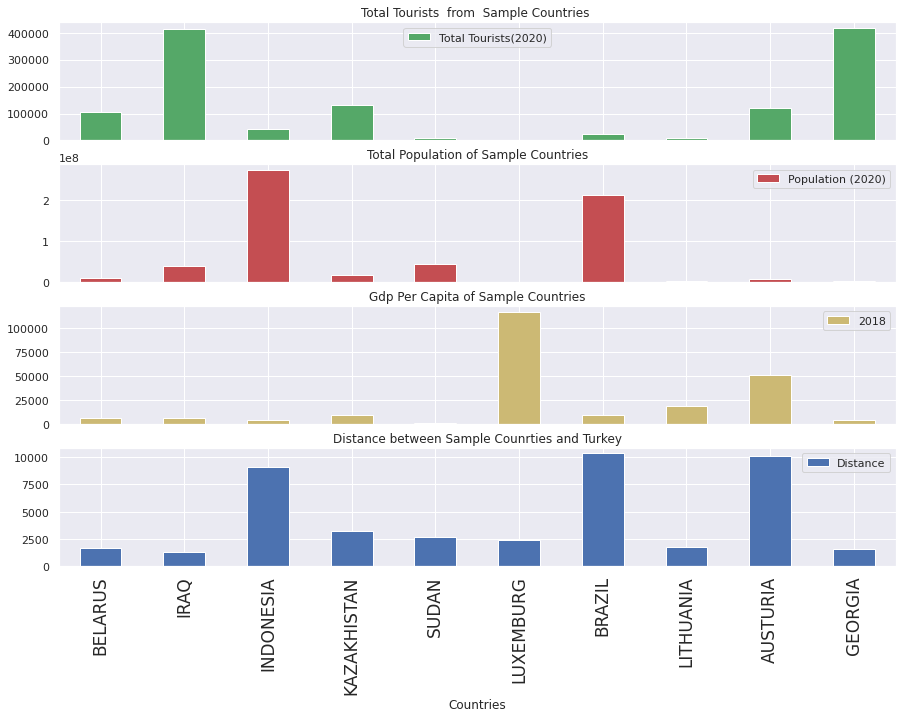

In [42]:
fig,axes = plt.subplots(nrows = 4, ncols = 1,figsize = (15,10,), sharex = True )
plt.xticks(fontsize=17, rotation=45)

ax = sample_tourist_num.plot(ax = axes[0],x = 'Countries', legend = '4',color = 'g', kind = 'bar')
ax.set_title('Total Tourists  from  Sample Countries ') 
ax.legend(['Total Tourists(2020)'], loc = 'upper center')  
 


ax = sample_pop.plot(ax = axes[1],x = 'Country (or dependency)',color = 'r', kind = 'bar')
ax.set_title('Total Population of Sample Countries')

ax = sample_gdp.plot(ax = axes[2],x = 'Country Name',color = 'y', kind = 'bar')
ax.set_title('Gdp Per Capita of Sample Countries')

ax = Sample_Distance.plot(ax = axes[3],x = 'Countries',color = 'b', kind = 'bar')
ax.set_title('Distance between Sample Counrties and Turkey')